1. Import Libraries & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/sales_data (1).csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Order Date,Product,Category,Quantity,Price,Sales
0,1,2024-01-05,Laptop,Electronics,1,60000,60000
1,2,2024-01-06,Mouse,Accessories,2,500,1000
2,3,2024-01-07,Keyboard,Accessories,1,1200,1200
3,4,2024-02-01,Monitor,Electronics,1,15000,15000
4,5,2024-02-03,Headphones,Accessories,1,2000,2000


2. Data Cleaning

In [3]:
print("Missing values:\n", df.isnull().sum())
df = df.drop_duplicates()
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing values:
 Order ID      0
Order Date    0
Product       0
Category      0
Quantity      0
Price         0
Sales         0
dtype: int64

Data Types:
 Order ID               int64
Order Date    datetime64[ns]
Product               object
Category              object
Quantity               int64
Price                  int64
Sales                  int64
dtype: object

Dataset Shape: (6, 7)


3. Add New Columns (Important for Analysis)

In [4]:
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"].dt.year
df["Month_Name"] = df["Order Date"].dt.strftime("%B")

4. Basic KPIs

In [5]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = df['Sales'].mean()
print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value, 2))

Total Sales: 141200
Total Orders: 6
Average Order Value: 23533.33


5. Monthly Sales Trend

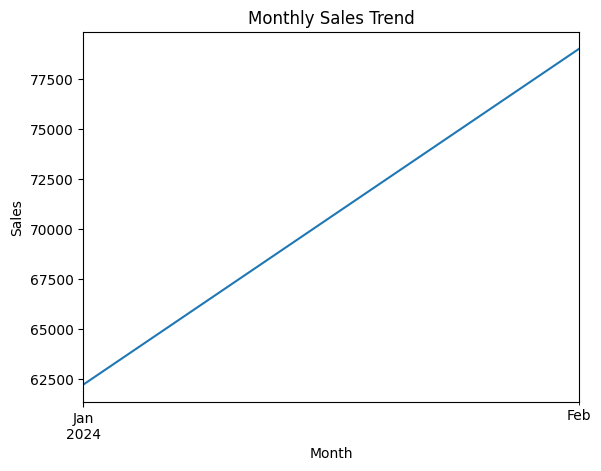

In [6]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

6. Category Sales

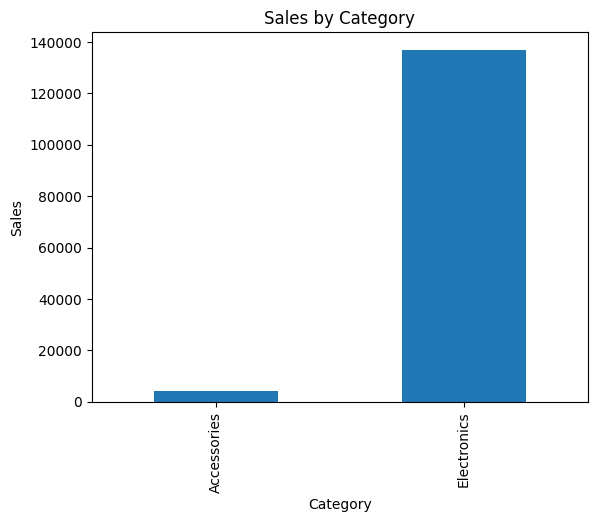

In [7]:
category_sales = df.groupby("Category")["Sales"].sum()
category_sales.plot(kind="bar")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

7. Top 5 Products

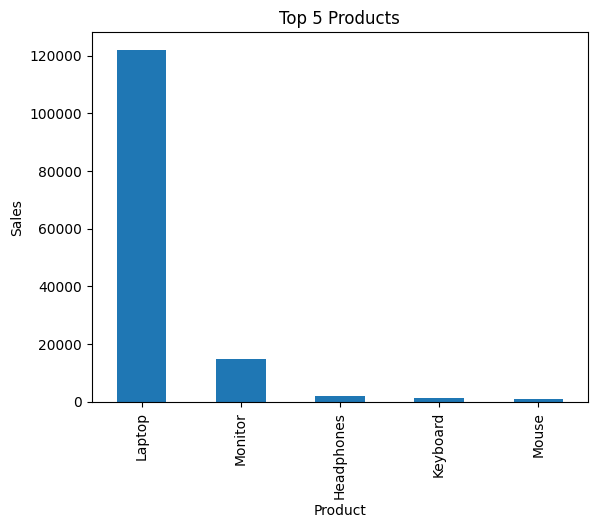

In [8]:
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar")
plt.title("Top 5 Products")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()

8. Quantity Sold by Category

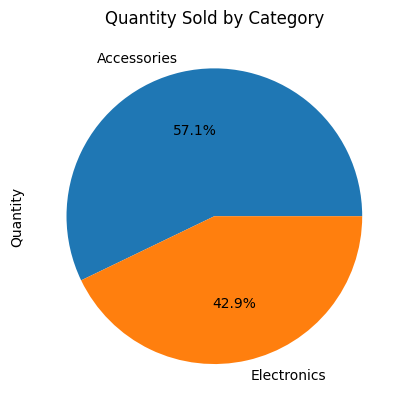

In [9]:
qty_category = df.groupby("Category")["Quantity"].sum()
qty_category.plot(kind="pie", autopct='%1.1f%%')
plt.title("Quantity Sold by Category")
plt.show()

9. Correlation Heatmap

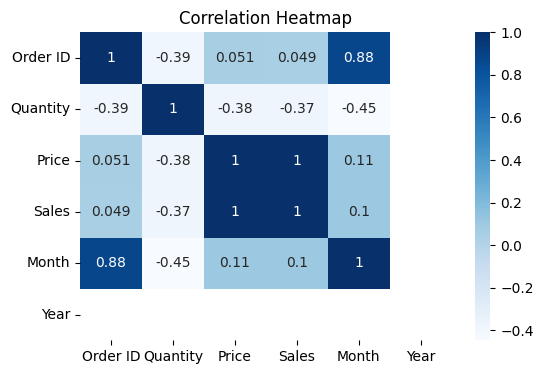

In [10]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

10. Outlier Detection (Boxplot)

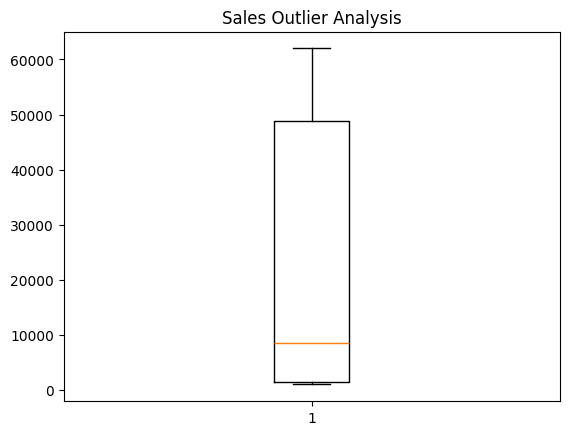

In [11]:
plt.boxplot(df["Sales"])
plt.title("Sales Outlier Analysis")
plt.show()

11. Save Cleaned Dataset (for GitHub)

In [12]:
df.to_csv("cleaned_sales_data.csv", index=False)

12. Final Insights Summary

In [13]:
print("******** Business Insights ********")
print(f"1️⃣ Total Revenue = ₹{df['Sales'].sum():,}")
print(f"2️⃣ Best Category = {df.groupby('Category')['Sales'].sum().idxmax()}")
print(f"3️⃣ Best Product = {df.groupby('Product')['Sales'].sum().idxmax()}")
print("4️⃣ Highest Sales Month =", monthly_sales.idxmax().strftime("%B %Y"))
print("5️⃣ Lowest Sales Month =", monthly_sales.idxmin().strftime("%B %Y"))
print("\n📌 Recommendation:")
print("• Increase stock for top-selling products.")
print("• Provide discounts for lowest-sales months.")
print("• Run category-wise marketing campaigns.")
print("• Improve pricing strategy for low-selling items.")


******** Business Insights ********
1️⃣ Total Revenue = ₹141,200
2️⃣ Best Category = Electronics
3️⃣ Best Product = Laptop
4️⃣ Highest Sales Month = February 2024
5️⃣ Lowest Sales Month = January 2024

📌 Recommendation:
• Increase stock for top-selling products.
• Provide discounts for lowest-sales months.
• Run category-wise marketing campaigns.
• Improve pricing strategy for low-selling items.
